**ARIMA**: AutoRegressive Integrated Moving Average model is characterized by 3 terms: p, q, d.

- **p:** is the order of the AR term
- **q:** is the order of the MA term
- **d:** is the number of differencing required to make the time series stationary

The first step to build an ARIMA model is to make the time series stationary. Because, term **Auto Regressive (AR)** in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are not correlated and are independent from each other.

### AR and MA models

* AR models suppose that $Y_t$ is a linear function of previous values.

$Y_t = \alpha + \beta_1Y_{t-1} + \beta_2Y_{t-2} + \ldots + \beta_pY_{t-p} + \epsilon_1$

* MA models suggest that the series presents fluctuations around an average value. We consider that the best estimation is the weighted mean of some previous values. In other words, it's the true mean plus a weighted sum of previous errors.

$Y_t = \mu - (\phi_1\epsilon_{t-1} + \phi_2\epsilon_{t-2} + \ldots + \phi_q\epsilon_{t-q})$

where the error terms are the errors of the autoregressive models of the respective lags.

An ARIMA model is one where the time series was differenced at least once to make it stationary and which combine the AR and the MA terms.

### Find the order of differencing (d) in ARIMA model

The purpose of differencing it to make the time series stationary. But we need to be careful to not over-difference the series. Because, an over differenced series may still be stationary, which in turn will affect the model parameters.

*The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.*

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, we can't really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

Let's see how to do it with an example.

First, I am going to check if the series is stationary using the Augmented Dickey Fuller test (`adfuller()`), from the `statsmodels` package. Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, $d = 0$.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df.head()

,value
0,88
1,84
2,85
3,85
4,84


In [34]:
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

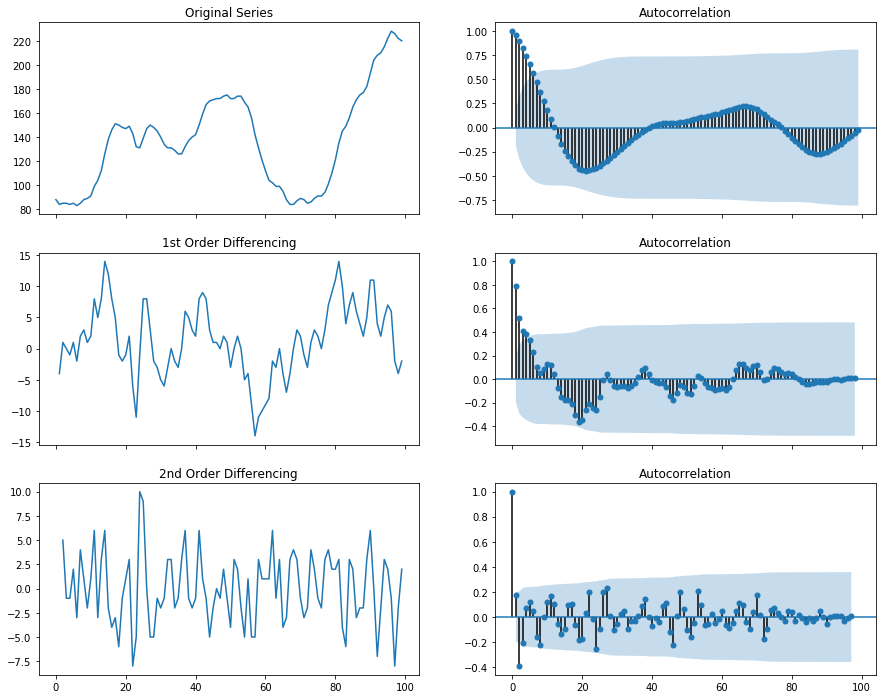

In [35]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15, 12))
axes[0, 0].plot(df.value.values)
axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff().values)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff().values)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()